<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [169]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [170]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def crossEntropyLoss(y_true, y_pred):
  loss = -y_true * np.log(y_pred + 1e-15)
  return np.sum(loss) / len(y_true)

def targetsSearch(data):
  predict = NN.feedforward(data)
  return [np.argmax(item) for item in predict.T]

In [171]:
class NeuralNetwork:

  def __init__(self, k):

    self.k = k

    self.loss = list()
  
  def feedforward(self, data):
    y = sigmoid(self.k @ data)
    return y
  
  def train(self, data, y_true):
    alpha = 0.01
    epochs = 2000

    for epoch in tqdm(range(epochs)):

      """backprop"""

      predict = self.feedforward(data)

      dL_dk = (predict - y_true) @ data.T

      self.k -= alpha * dL_dk

      self.loss.append(crossEntropyLoss(y_true.T, predict.T))

In [172]:
kParameters = np.random.random_sample((10, 256))
NN = NeuralNetwork(kParameters)
NN.train(trainInputs, trainTargets)



  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  

 34%|███▎      | 673/2000 [00:14<00:27, 48.55it/s]

KeyboardInterrupt: ignored

In [151]:
confMatrixTest = [[0 for i in range(10)] for j in range(10)]
confMatrixTrain = [[0 for i in range(10)] for j in range(10)]
confMatrixValidation = [[0 for i in range(10)] for j in range(10)]

testPredictions = targetsSearch(testInputs)
validationPredictions = targetsSearch(validationInputs)
trainPredictions = targetsSearch(trainInputs)


for index in range(len(trainPredictions)):
  if index < 1000:
    confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
    confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1
  confMatrixTrain[np.argmax(trainTargets.T[index])][trainPredictions[index]] += 1

In [153]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

89.2


[[93, 1, 0, 0, 1, 1, 0, 0, 4, 0],
 [1, 94, 0, 1, 1, 0, 0, 0, 3, 0],
 [2, 1, 85, 2, 0, 0, 5, 1, 4, 0],
 [2, 0, 0, 91, 0, 4, 0, 0, 2, 1],
 [0, 2, 1, 0, 86, 0, 2, 1, 0, 8],
 [2, 2, 0, 9, 1, 85, 0, 0, 1, 0],
 [1, 3, 1, 0, 2, 1, 91, 0, 1, 0],
 [0, 2, 0, 0, 0, 0, 0, 95, 0, 3],
 [0, 4, 0, 2, 1, 1, 0, 2, 89, 1],
 [0, 2, 1, 0, 6, 0, 0, 4, 4, 83]]

In [154]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

90.3


[[96, 1, 0, 0, 1, 0, 1, 0, 1, 0],
 [1, 92, 0, 1, 2, 0, 0, 0, 4, 0],
 [0, 0, 85, 3, 1, 0, 2, 0, 9, 0],
 [0, 0, 2, 89, 0, 5, 1, 1, 1, 1],
 [0, 3, 0, 0, 89, 0, 5, 0, 0, 3],
 [2, 0, 0, 5, 0, 85, 1, 0, 3, 4],
 [1, 4, 0, 0, 1, 1, 92, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 92, 0, 5],
 [1, 3, 1, 1, 0, 2, 0, 0, 91, 1],
 [0, 1, 0, 1, 5, 0, 0, 1, 0, 92]]

In [155]:
print(np.mean([confMatrixTrain[i][i] for i in range(10)]))
confMatrixTrain

813.2


[[873, 4, 1, 3, 5, 2, 9, 0, 3, 0],
 [4, 842, 2, 6, 9, 1, 2, 3, 31, 0],
 [3, 8, 794, 9, 7, 4, 20, 8, 42, 5],
 [7, 3, 14, 812, 0, 33, 2, 10, 14, 5],
 [4, 32, 3, 0, 794, 1, 15, 1, 9, 41],
 [23, 7, 2, 51, 3, 785, 6, 1, 15, 7],
 [11, 28, 2, 2, 8, 1, 842, 0, 6, 0],
 [7, 11, 3, 1, 4, 3, 0, 833, 13, 25],
 [9, 43, 14, 19, 11, 31, 1, 3, 749, 20],
 [1, 24, 0, 0, 27, 1, 0, 22, 17, 808]]

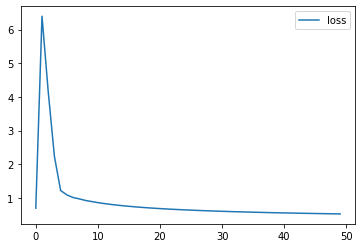

In [156]:
plt.plot(NN.loss, label='loss')
plt.legend()